In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('../../../Cleaned Datasets/emissions_cleaned.csv')

X = df.drop(columns=["Comb CO2"])
y = df["Comb CO2"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
df

,Displ,Trans,Drive,Fuel,Stnd,Veh Class,Air Pollution Score,City MPG,Comb CO2
0,2.4,2.0,0.0,2.0,6.0,5.0,3.0,24.0,316.0
1,2.4,2.0,0.0,2.0,11.0,5.0,3.0,24.0,316.0
2,3.0,1.0,1.0,2.0,6.0,4.0,3.0,26.0,330.0
3,3.0,1.0,1.0,2.0,11.0,4.0,3.0,26.0,330.0
4,3.5,28.0,0.0,2.0,6.0,4.0,3.0,20.0,387.0
...,...,...,...,...,...,...,...,...,...
10598,2.0,27.0,1.0,2.0,16.0,4.0,5.0,22.0,363.0
10599,2.0,27.0,1.0,2.0,8.0,7.0,5.0,22.0,369.0
10600,2.0,27.0,1.0,2.0,16.0,7.0,5.0,22.0,369.0
10601,2.0,27.0,1.0,2.0,5.0,7.0,7.0,20.0,393.0


In [11]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


svr_rbf = SVR(kernel='rbf', C=200, gamma=0.14)
svr_test = svr_rbf.fit(X_train, y_train)


y_pred = svr_rbf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse**.5
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Absolute Error: 5.394255230233834
Mean Squared Error: 88.56714820828074
Root Mean Squared Error: 9.411012071412975
R-squared score: 0.9800288032882551


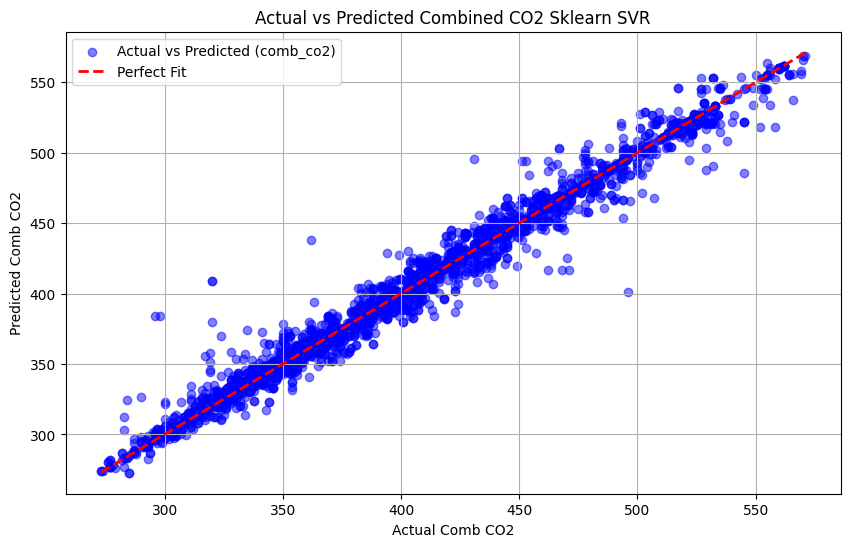

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted (comb_co2)', alpha=0.5)
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--', lw=2,
         label='Perfect Fit')
plt.xlabel('Actual Comb CO2')
plt.ylabel('Predicted Comb CO2')
plt.title('Actual vs Predicted Combined CO2 Sklearn SVR')
plt.legend()
plt.grid(True)
plt.show()